<a href="https://colab.research.google.com/github/nidhi-158/Flight-price/blob/main/FlightPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
business_df=pd.read_csv("/content/business.csv")

In [3]:
economy_df=pd.read_csv("/content/economy.csv")

In [4]:
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [5]:
economy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [6]:
business_df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [72]:
economy_df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'class'],
      dtype='object')

In [8]:
business_df.shape

(93487, 11)

In [9]:
economy_df.shape

(206774, 11)

In [10]:
business_df['class']='Business'
economy_df['class']='Economy'

In [11]:
business_df['stop'] = business_df['stop'].str.replace(r'\n', ' ', regex=True)
business_df['stop'] = business_df['stop'].str.replace(r'\t', ' ', regex=True)

# Save back to the original CSV file
business_df.to_csv("/content/business.csv", index=False)

In [12]:
# Remove '\n' and '\t' characters from 'stop' column in economy_df
economy_df['stop'] = economy_df['stop'].str.replace(r'\n', ' ', regex=True)
economy_df['stop'] = economy_df['stop'].str.replace(r'\t', ' ', regex=True)

# Save back to the original CSV file
economy_df.to_csv("/content/economy.csv", index=False)

In [13]:
df=pd.concat([business_df,economy_df],ignore_index=True)

In [14]:
df.rename(columns={'from':'From','dep_time':'Departure_time','arr_time':'Arrival_time','time_taken':'Duration','to':'To'},inplace=True)

In [15]:
df.shape

(300261, 12)

In [16]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'Departure_time', 'From',
       'Duration', 'stop', 'Arrival_time', 'To', 'price', 'class'],
      dtype='object')

In [17]:
df['airline'].unique()

array(['Air India', 'Vistara', 'SpiceJet', 'AirAsia', 'GO FIRST',
       'Indigo', 'Trujet', 'StarAir'], dtype=object)

In [18]:
df.dtypes

,0
date,object
airline,object
ch_code,object
num_code,int64
Departure_time,object
From,object
Duration,object
stop,object
Arrival_time,object
To,object


In [19]:
df['price'] =df['price'].str.replace(',', '', regex=True)

In [20]:
df['price'] = df['price'].astype(int)

In [21]:
df['price'].dtypes

dtype('int64')

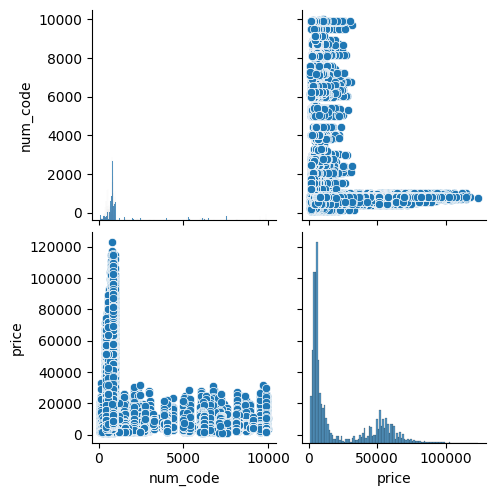

In [ ]:
sns.pairplot(df)

<Axes: xlabel='class', ylabel='price'>

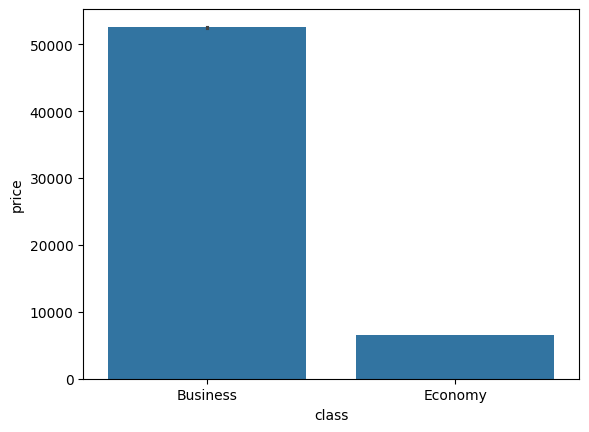

In [ ]:
sns.barplot(x='class',y='price',data=df)

In [22]:
airline_Count = df.groupby(['airline', 'class']).size().reset_index(name='count')

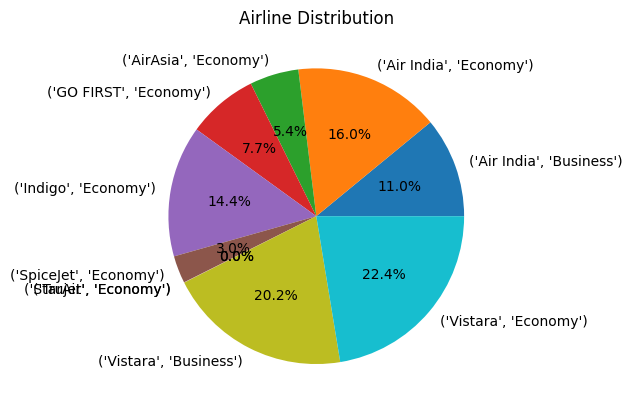

In [23]:
plt.pie(airline_Count['count'], labels=airline_Count[['airline', 'class']].apply(tuple, axis=1), autopct='%1.1f%%')
plt.title('Airline Distribution')
plt.show()

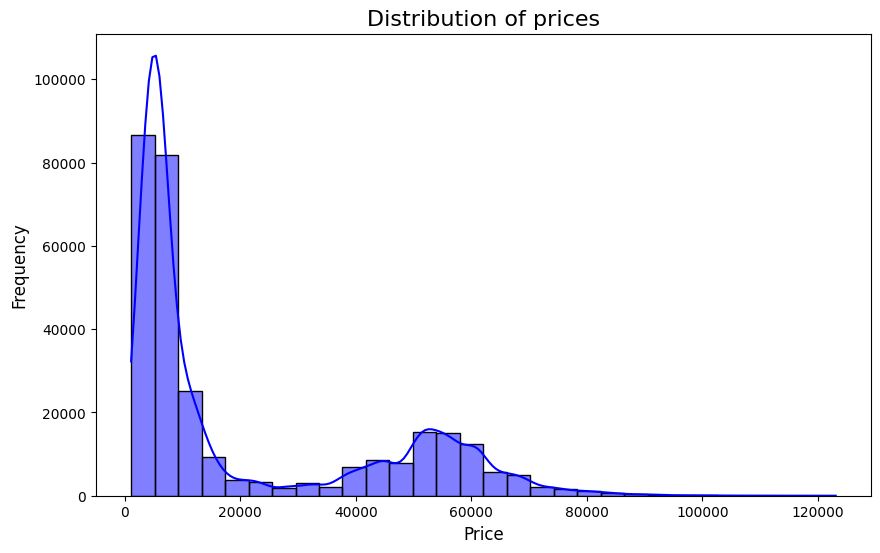

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],kde=True,color='blue',bins=30)
plt.title('Distribution of prices',fontsize=16)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

<ipython-input-25-8bbf902f0f3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='price', data=df, palette='Set2')


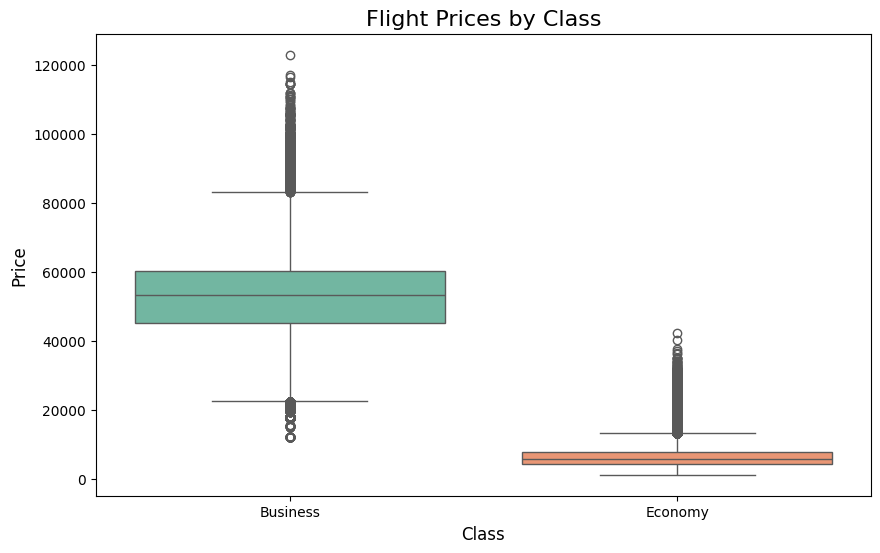

In [25]:
# Boxplot of Price by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=df, palette='Set2')
plt.title('Flight Prices by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

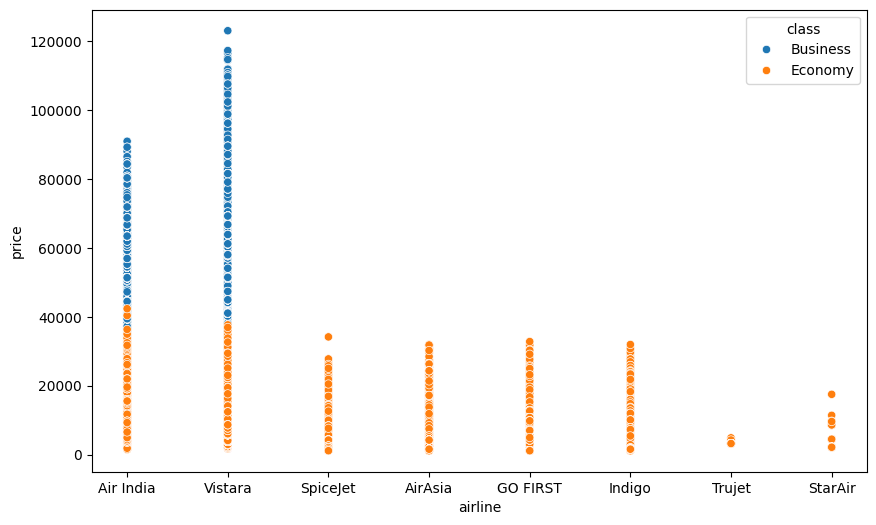

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='airline',y='price',hue='class',data=df)
plt.show()

In [27]:
df['From'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [28]:
from_flights=df.groupby('From').size().reset_index(name='count')

In [29]:
from_flights

,From,count
0,Bangalore,52106
1,Chennai,38700
2,Delhi,61345
3,Hyderabad,40860
4,Kolkata,46347
5,Mumbai,60903


<ipython-input-30-e74663b03f69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='From',y='count',data=from_flights,palette='coolwarm')


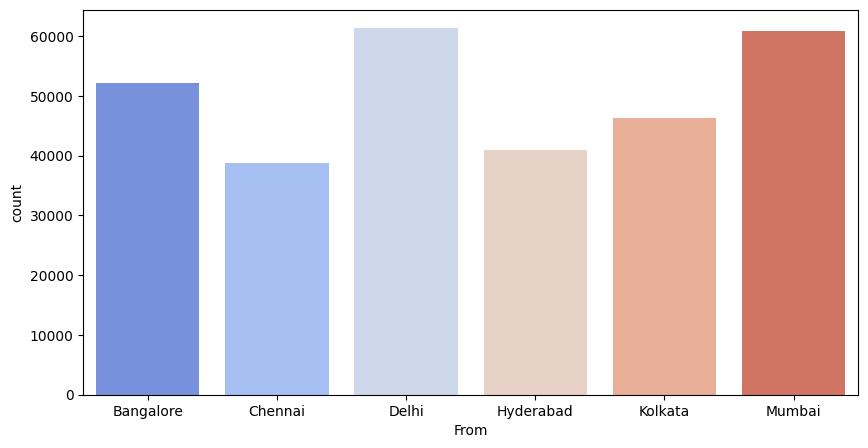

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='From',y='count',data=from_flights,palette='coolwarm')
plt.show()

In [31]:
to_flights=df.groupby('To').size().reset_index(name='count')

In [32]:
to_flights

,To,count
0,Bangalore,51112
1,Chennai,40368
2,Delhi,57361
3,Hyderabad,42776
4,Kolkata,49535
5,Mumbai,59109


<ipython-input-33-36e1cb374ce2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='To',y='count',data=to_flights,palette='coolwarm')


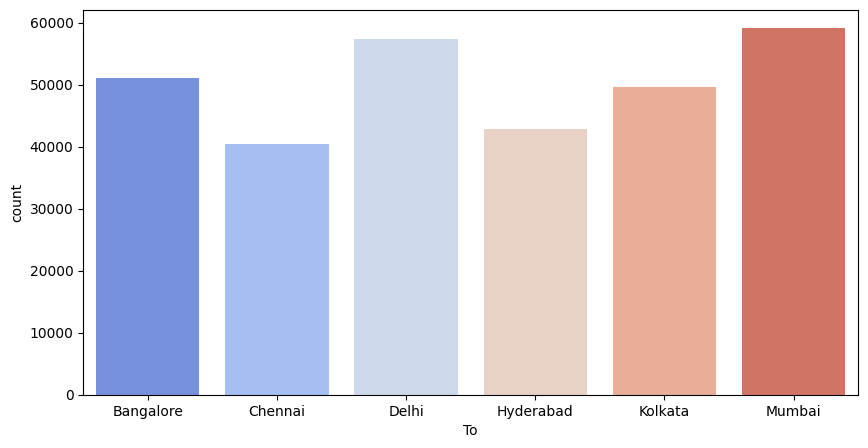

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='To',y='count',data=to_flights,palette='coolwarm')
plt.show()

In [34]:
class_Count=df.groupby('class').size().reset_index(name='count')

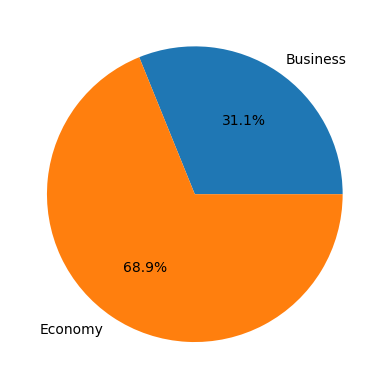

In [35]:
plt.pie(class_Count['count'],labels=class_Count['class'],autopct='%1.1f%%')
plt.show()

In [36]:
df['date'].unique()

array(['11-02-2022', '12-02-2022', '13-02-2022', '14-02-2022',
       '15-02-2022', '16-02-2022', '17-02-2022', '18-02-2022',
       '19-02-2022', '20-02-2022', '21-02-2022', '22-02-2022',
       '23-02-2022', '24-02-2022', '25-02-2022', '26-02-2022',
       '27-02-2022', '28-02-2022', '01-03-2022', '02-03-2022',
       '03-03-2022', '04-03-2022', '05-03-2022', '06-03-2022',
       '07-03-2022', '08-03-2022', '09-03-2022', '10-03-2022',
       '11-03-2022', '12-03-2022', '13-03-2022', '14-03-2022',
       '15-03-2022', '16-03-2022', '17-03-2022', '18-03-2022',
       '19-03-2022', '20-03-2022', '21-03-2022', '22-03-2022',
       '23-03-2022', '24-03-2022', '25-03-2022', '26-03-2022',
       '27-03-2022', '28-03-2022', '29-03-2022', '30-03-2022',
       '31-03-2022'], dtype=object)

In [37]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

In [38]:
df['Day']=df['date'].dt.day
df['Month']=df['date'].dt.month
df['Year']=df['date'].dt.year
df['Day_of_week']=df['date'].dt.dayofweek  #0:Monday,6:Sumday

df['Isweekend']=df['date'].dt.dayofweek.apply(lambda x:1 if x >= 5 else 0) #1:saturday/sunday

In [39]:
df.drop('date',axis=1)

,airline,ch_code,num_code,Departure_time,From,Duration,stop,Arrival_time,To,price,class,Day,Month,Year,Day_of_week,Isweekend
0,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,Business,11,2,2022,4,0
1,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,Business,11,2,2022,4,0
2,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,Business,11,2,2022,4,0
3,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,Business,11,2,2022,4,0
4,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,Business,11,2,2022,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,7697,Economy,31,3,2022,3,0
300257,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,7709,Economy,31,3,2022,3,0
300258,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop,09:05,Hyderabad,8640,Economy,31,3,2022,3,0
300259,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop,09:05,Hyderabad,8640,Economy,31,3,2022,3,0


In [40]:
# Group by 'Year' and count the number of flights
yearly_flights = df.groupby('Year').size().reset_index(name='count')

In [41]:
monthly_flights=df.groupby('Month').size().reset_index(name='count')

In [42]:
monthly_flights

,Month,count
0,2,100589
1,3,199672


<ipython-input-43-14787a76657f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month',y='count',data=monthly_flights,palette='viridis')


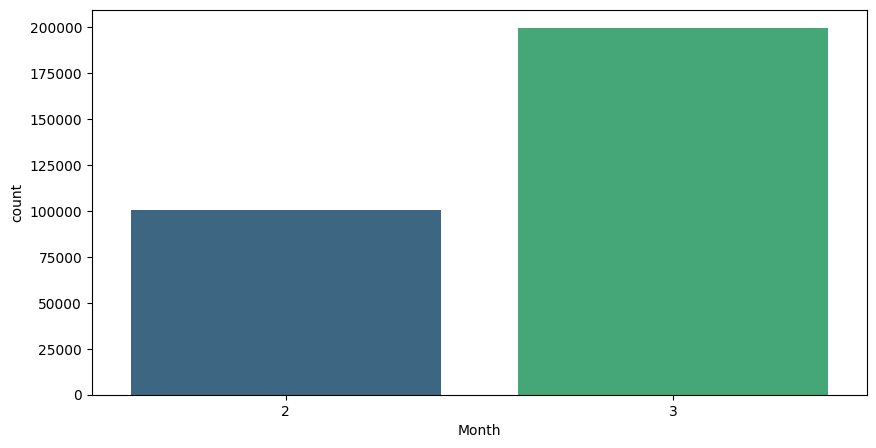

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='count',data=monthly_flights,palette='viridis')
plt.show()

In [44]:
monthly_price=df.groupby('Month')['price'].mean().reset_index()

In [45]:
monthly_price

,Month,price
0,2,23835.836791
1,3,19396.525116


In [46]:
daily_flights=df.groupby('Day').size().reset_index(name='count')

<ipython-input-47-5b75080061d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day',y='count',data=daily_flights,palette='viridis')


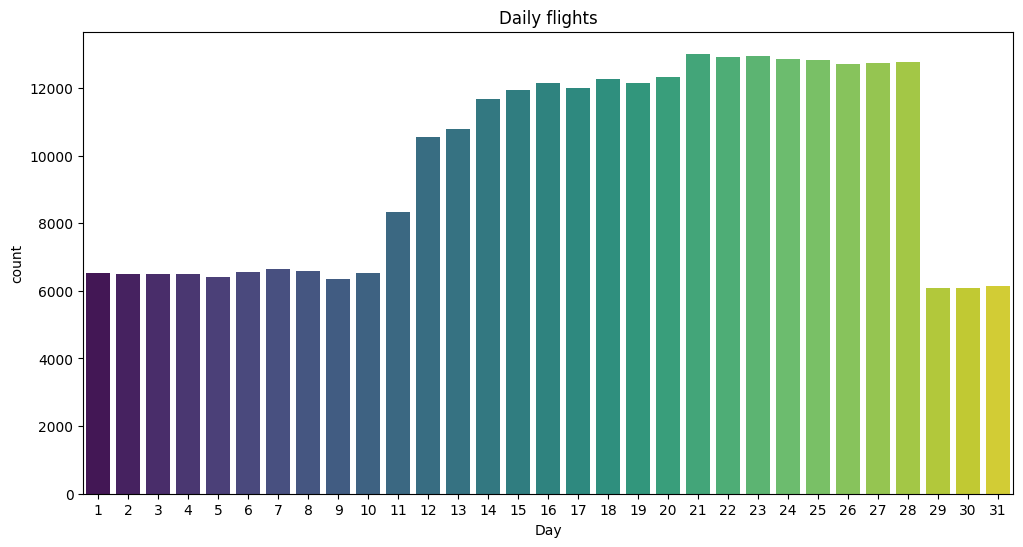

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day',y='count',data=daily_flights,palette='viridis')
plt.title('Daily flights')
plt.show()

<ipython-input-48-a8c1f1671157>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day',y='price',data=df,palette='Set2')


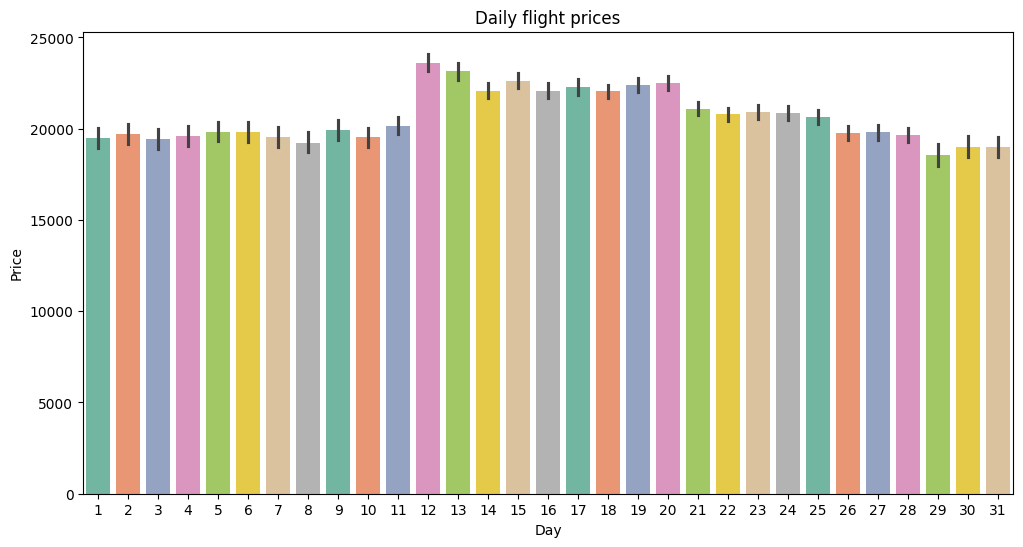

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day',y='price',data=df,palette='Set2')
plt.title('Daily flight prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [49]:
weekend_flights=df.groupby('Isweekend').size().reset_index(name='count')

In [50]:
weekend_flights

,Isweekend,count
0,0,216053
1,1,84208


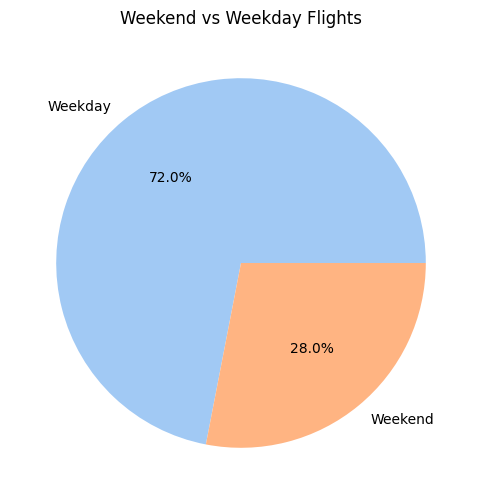

In [51]:
weekend_flights['Isweekend'] = weekend_flights['Isweekend'].map({0: 'Weekday', 1: 'Weekend'})

plt.figure(figsize=(10, 6))
plt.pie(
    weekend_flights['count'],
    labels=weekend_flights['Isweekend'],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel')
)
plt.title('Weekend vs Weekday Flights')
plt.show()


In [52]:
weekend_price=df.groupby('Isweekend')['price'].mean()

In [53]:
weekend_price

,price
Isweekend,
0,20654.402128
1,21472.073995


<ipython-input-54-69a9b77c1fb1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Isweekend', y='price', data=weekend_weekday_price, palette='coolwarm')


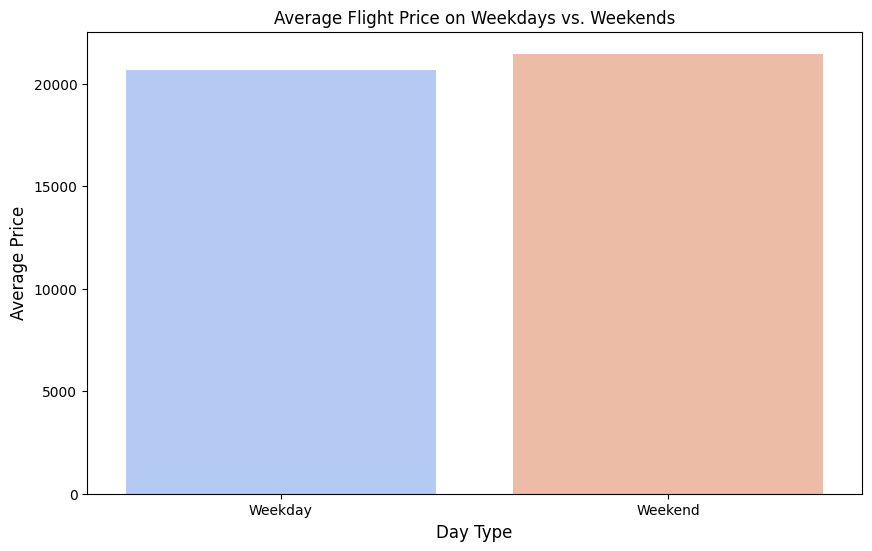

In [54]:
weekend_weekday_price = df.groupby('Isweekend')['price'].mean().reset_index()

# Replace 0 and 1 with labels for better readability
weekend_weekday_price['Isweekend'] = weekend_weekday_price['Isweekend'].replace({0: 'Weekday', 1: 'Weekend'})

# Plot the average price
plt.figure(figsize=(10, 6))
sns.barplot(x='Isweekend', y='price', data=weekend_weekday_price, palette='coolwarm')
plt.title('Average Flight Price on Weekdays vs. Weekends')
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.show()


In [55]:
stop_wise_flights=df.groupby('stop').size().reset_index(name='count')

In [56]:
stop_wise_flights

,stop,count
0,1-stop,243603
1,1-stop Via BBI,158
2,1-stop Via Bhubaneswar,301
3,1-stop Via Chennai,77
4,1-stop Via Delhi,153
5,1-stop Via GAU,3
6,1-stop Via GAY,3
7,1-stop Via GOP,16
8,1-stop Via Guwahati,55
9,1-stop Via HYD,1


In [57]:
flights_by_day=df.groupby('Day_of_week').size().reset_index(name='count')

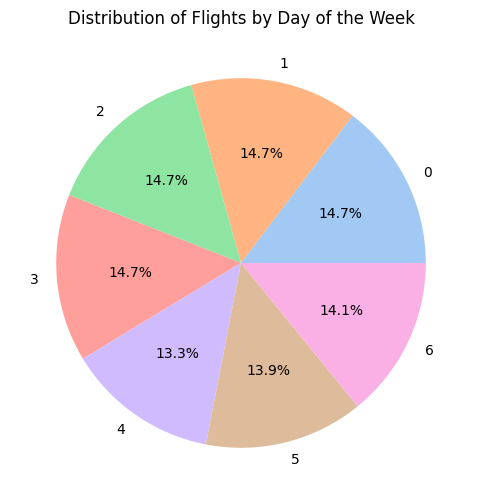

In [58]:
plt.figure(figsize=(10, 6))
plt.pie(flights_by_day['count'], labels=flights_by_day['Day_of_week'], autopct='%1.1f%%',colors=sns.color_palette('pastel')) # Changed 'flight_count' to 'count'
plt.title('Distribution of Flights by Day of the Week')
plt.show()

In [59]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'Departure_time', 'From',
       'Duration', 'stop', 'Arrival_time', 'To', 'price', 'class', 'Day',
       'Month', 'Year', 'Day_of_week', 'Isweekend'],
      dtype='object')

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [61]:
# Step 1: Label Encoding for categorical features
label_encoders = {}
for column in ['airline', 'stop', 'From', 'To', 'Duration','ch_code','Departure_time','Arrival_time','class']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [62]:
# Step 2: Scaling 'price' column
scaler = MinMaxScaler()
df['price'] = scaler.fit_transform(df[['price']])

In [63]:
# Step 3: Define Features (X) and Target (y)
X = df.drop(['price','date'], axis=1)
y = df['price']

In [64]:
# Step 4: Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [66]:
y_pred=model.predict(X_test)

In [67]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [68]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-Squared : {r2}')

Mean Squared Error (MSE): 0.00030903796305461394
Mean Absolute Error (MAE): 0.006784034395423035
R-Squared : 0.9910539547544912


In [71]:
# Step 2: User Input Function (Simplified)
def get_user_input():
    print("\nEnter flight details:")
    date = input("Travel Date (format: YYYY-MM-DD): ")
    From = input("Departure City: ")
    To = input("Arrival City: ")
    flight_class = input("Class (e.g., Business, Economy): ")

    # Create a dictionary for the input data
    input_data = {
        'date': [date],
        'From': [From],
        'To': [To],
        'class': [flight_class]
    }
    return pd.DataFrame(input_data)

# Step 3: Preprocess User Input
def preprocess_input(input_df):
    # Process only the required columns
    for column in input_df.columns:
        if column in label_encoders:
            input_df[column] = label_encoders[column].transform(input_df[column])
    return input_df

# Step 4: Make Predictions
def predict_price():
    user_input_df = get_user_input()
    try:
        # Preprocess the user input
        processed_input = preprocess_input(user_input_df)

        # Ensure only relevant columns are passed to the model
        relevant_features = ['From', 'To', 'class']
        processed_input = processed_input[relevant_features]

        # Predict using the trained model
        prediction = model.predict(processed_input)

        # Inverse transform the price to get the original scale
        predicted_price = scaler.inverse_transform(prediction.reshape(-1, 1))
        print(f"\nPredicted Flight Price: {predicted_price[0][0]:.2f}")
    except Exception as e:
        print("\nError in processing the input. Please check the details and try again.")
        print(str(e))

# Step 5: Call the Predict Function
if __name__ == "__main__":
    predict_price()


Enter flight details:
Travel Date (format: YYYY-MM-DD): 2022-03-05
Departure City: Mumbai
Arrival City: Delhi
Class (e.g., Business, Economy): Economy

Error in processing the input. Please check the details and try again.
invalid literal for int() with base 10: 'Mumbai'
